# Wisonsin Breast Cancer Prediction Using  3 Machine Learning Techniques

Wisonsin Breast Cancer Predition

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.  They describe characteristics of the cell nuclei present in the image. A few of the images can be found at http://www.cs.wisc.edu/~street/images/

Separating plane described above was obtained using Multisurface Method-Tree (MSM-T) [K. P. Bennett, "Decision Tree Construction Via Linear Programming." Proceedings of the 4th Midwest Artificial Intelligence and Cognitive Science Society, pp. 97-101, 1992], a classification method which uses linear programming to construct a decision tree.  Relevant features were selected using an exhaustive search in the space of 1-4 features and 1-3 separating planes.

The actual linear program used to obtain the separating plane in the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].


## About the Dataset

4-33) Ten real-valued features are computed for each cell nucleus:



1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry 
10) fractal dimension ("coastline approximation" - 1)"



## Main objectives

Use Support Vector Machine (SVM), Logistic Regression, and K-Nearest Neighbors (KNN) to study the dataset and discern the most effective model for accurate breast cancer classification, thereby advancing both clinical diagnosis and predictive analytics in oncology.

1) leverage SVM to delineate clear boundaries between malignant and benign tumor instances, maximizing classification accuracy and minimizing false predictions. 

2) Logistic regression is employed to model the probability of breast cancer occurrence based on various features, facilitating interpretation of how each feature contributes to the risk assessment. 

3) KNN is utilized to classify tumors based on the similarity of their features to those of neighboring instances, providing a non-parametric approach suitable for complex data distributions. 








# Import Python Libraries

In [2]:
#data handling
import pandas as pd
import numpy as np

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

#feature selection
from sklearn.feature_selection import mutual_info_classif

#classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# performance metrics
from sklearn.metrics import balanced_accuracy_score,f1_score,precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score


# Read in the Data

Can get the data directly from the UCI repository

In [3]:
#pip install ucimlrepo

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 

In [4]:
df = fetch_ucirepo(id=17) 

In [5]:
# data (as pandas dataframes) 
X = breast_cancer_wisconsin_diagnostic.data.features 
y = breast_cancer_wisconsin_diagnostic.data.targets 
  
# metadata 
print(breast_cancer_wisconsin_diagnostic.metadata) 
  
# variable information 
print(breast_cancer_wisconsin_diagnostic.variables) 


{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'published_in': 'Electronic imaging', 'year': 1993, 'url': 'https://www.semanticscholar.org/paper/53

Data came automatically separated and will concat them into a single pandas DF

In [6]:
df = pd.concat([X, y], axis=1)

In [7]:
df.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


The `describe()` function will provide the statistical information about all numeric values.

In [8]:
df.describe()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   radius1             569 non-null    float64
 1   texture1            569 non-null    float64
 2   perimeter1          569 non-null    float64
 3   area1               569 non-null    float64
 4   smoothness1         569 non-null    float64
 5   compactness1        569 non-null    float64
 6   concavity1          569 non-null    float64
 7   concave_points1     569 non-null    float64
 8   symmetry1           569 non-null    float64
 9   fractal_dimension1  569 non-null    float64
 10  radius2             569 non-null    float64
 11  texture2            569 non-null    float64
 12  perimeter2          569 non-null    float64
 13  area2               569 non-null    float64
 14  smoothness2         569 non-null    float64
 15  compactness2        569 non-null    float64
 16  concavit

According to the output above we have all features and all are floats except for Diagnosis which is an object Dtype. This will likely need to be turned into a .



Replace the M and B in Diagnosis 1 / 0 (Malignant and Benign)

In [10]:
df['Diagnosis'] = df['Diagnosis'].replace({'M': 1, 'B': 0})

Change Diagnosis to float

In [11]:
df['Diagnosis'] = df['Diagnosis'].astype(float)

In [12]:
df['Diagnosis'].dtype

dtype('float64')

## **Data Cleaning and Wrangling**

In [13]:
df.isnull().sum()

radius1               0
texture1              0
perimeter1            0
area1                 0
smoothness1           0
compactness1          0
concavity1            0
concave_points1       0
symmetry1             0
fractal_dimension1    0
radius2               0
texture2              0
perimeter2            0
area2                 0
smoothness2           0
compactness2          0
concavity2            0
concave_points2       0
symmetry2             0
fractal_dimension2    0
radius3               0
texture3              0
perimeter3            0
area3                 0
smoothness3           0
compactness3          0
concavity3            0
concave_points3       0
symmetry3             0
fractal_dimension3    0
Diagnosis             0
dtype: int64

## Part 1: Setup

* Create the target variable `y` as a 1/0 column where 1 means Breast Cancer.
* Create a `pairplot` for the dataset.
* Create a bar plot showing the correlations between each column and `y`
* Pick the most 2 correlated fields (using the absolute value of correlations) and create `X`
* Use MinMaxScaler to scale `X`. Note that this will output a np.array. Make it a DataFrame again and rename the columns appropriately.


# **Data Cleaning and Wrangling**

Pearson's correlation with respect to 'Diagnosis'

In [14]:
df.dtypes

radius1               float64
texture1              float64
perimeter1            float64
area1                 float64
smoothness1           float64
compactness1          float64
concavity1            float64
concave_points1       float64
symmetry1             float64
fractal_dimension1    float64
radius2               float64
texture2              float64
perimeter2            float64
area2                 float64
smoothness2           float64
compactness2          float64
concavity2            float64
concave_points2       float64
symmetry2             float64
fractal_dimension2    float64
radius3               float64
texture3              float64
perimeter3            float64
area3                 float64
smoothness3           float64
compactness3          float64
concavity3            float64
concave_points3       float64
symmetry3             float64
fractal_dimension3    float64
Diagnosis             float64
dtype: object

If there were categorical variables these would be explored separately also, and dummy varibales may or may not have been implemented

In [14]:
#can only input numeric features
numeric_data = df.select_dtypes(include=['float64', 'object'])

corr_matrix = numeric_data.corr()

corr_matrix['Diagnosis'].sort_values(ascending=False)

Diagnosis             1.000000
concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
symmetry2            -0.006522
texture2             -0.008303
fractal_dimension1   -0.012838
smoothness2          -0.067016
Name: Diagnosis, dtype: float64

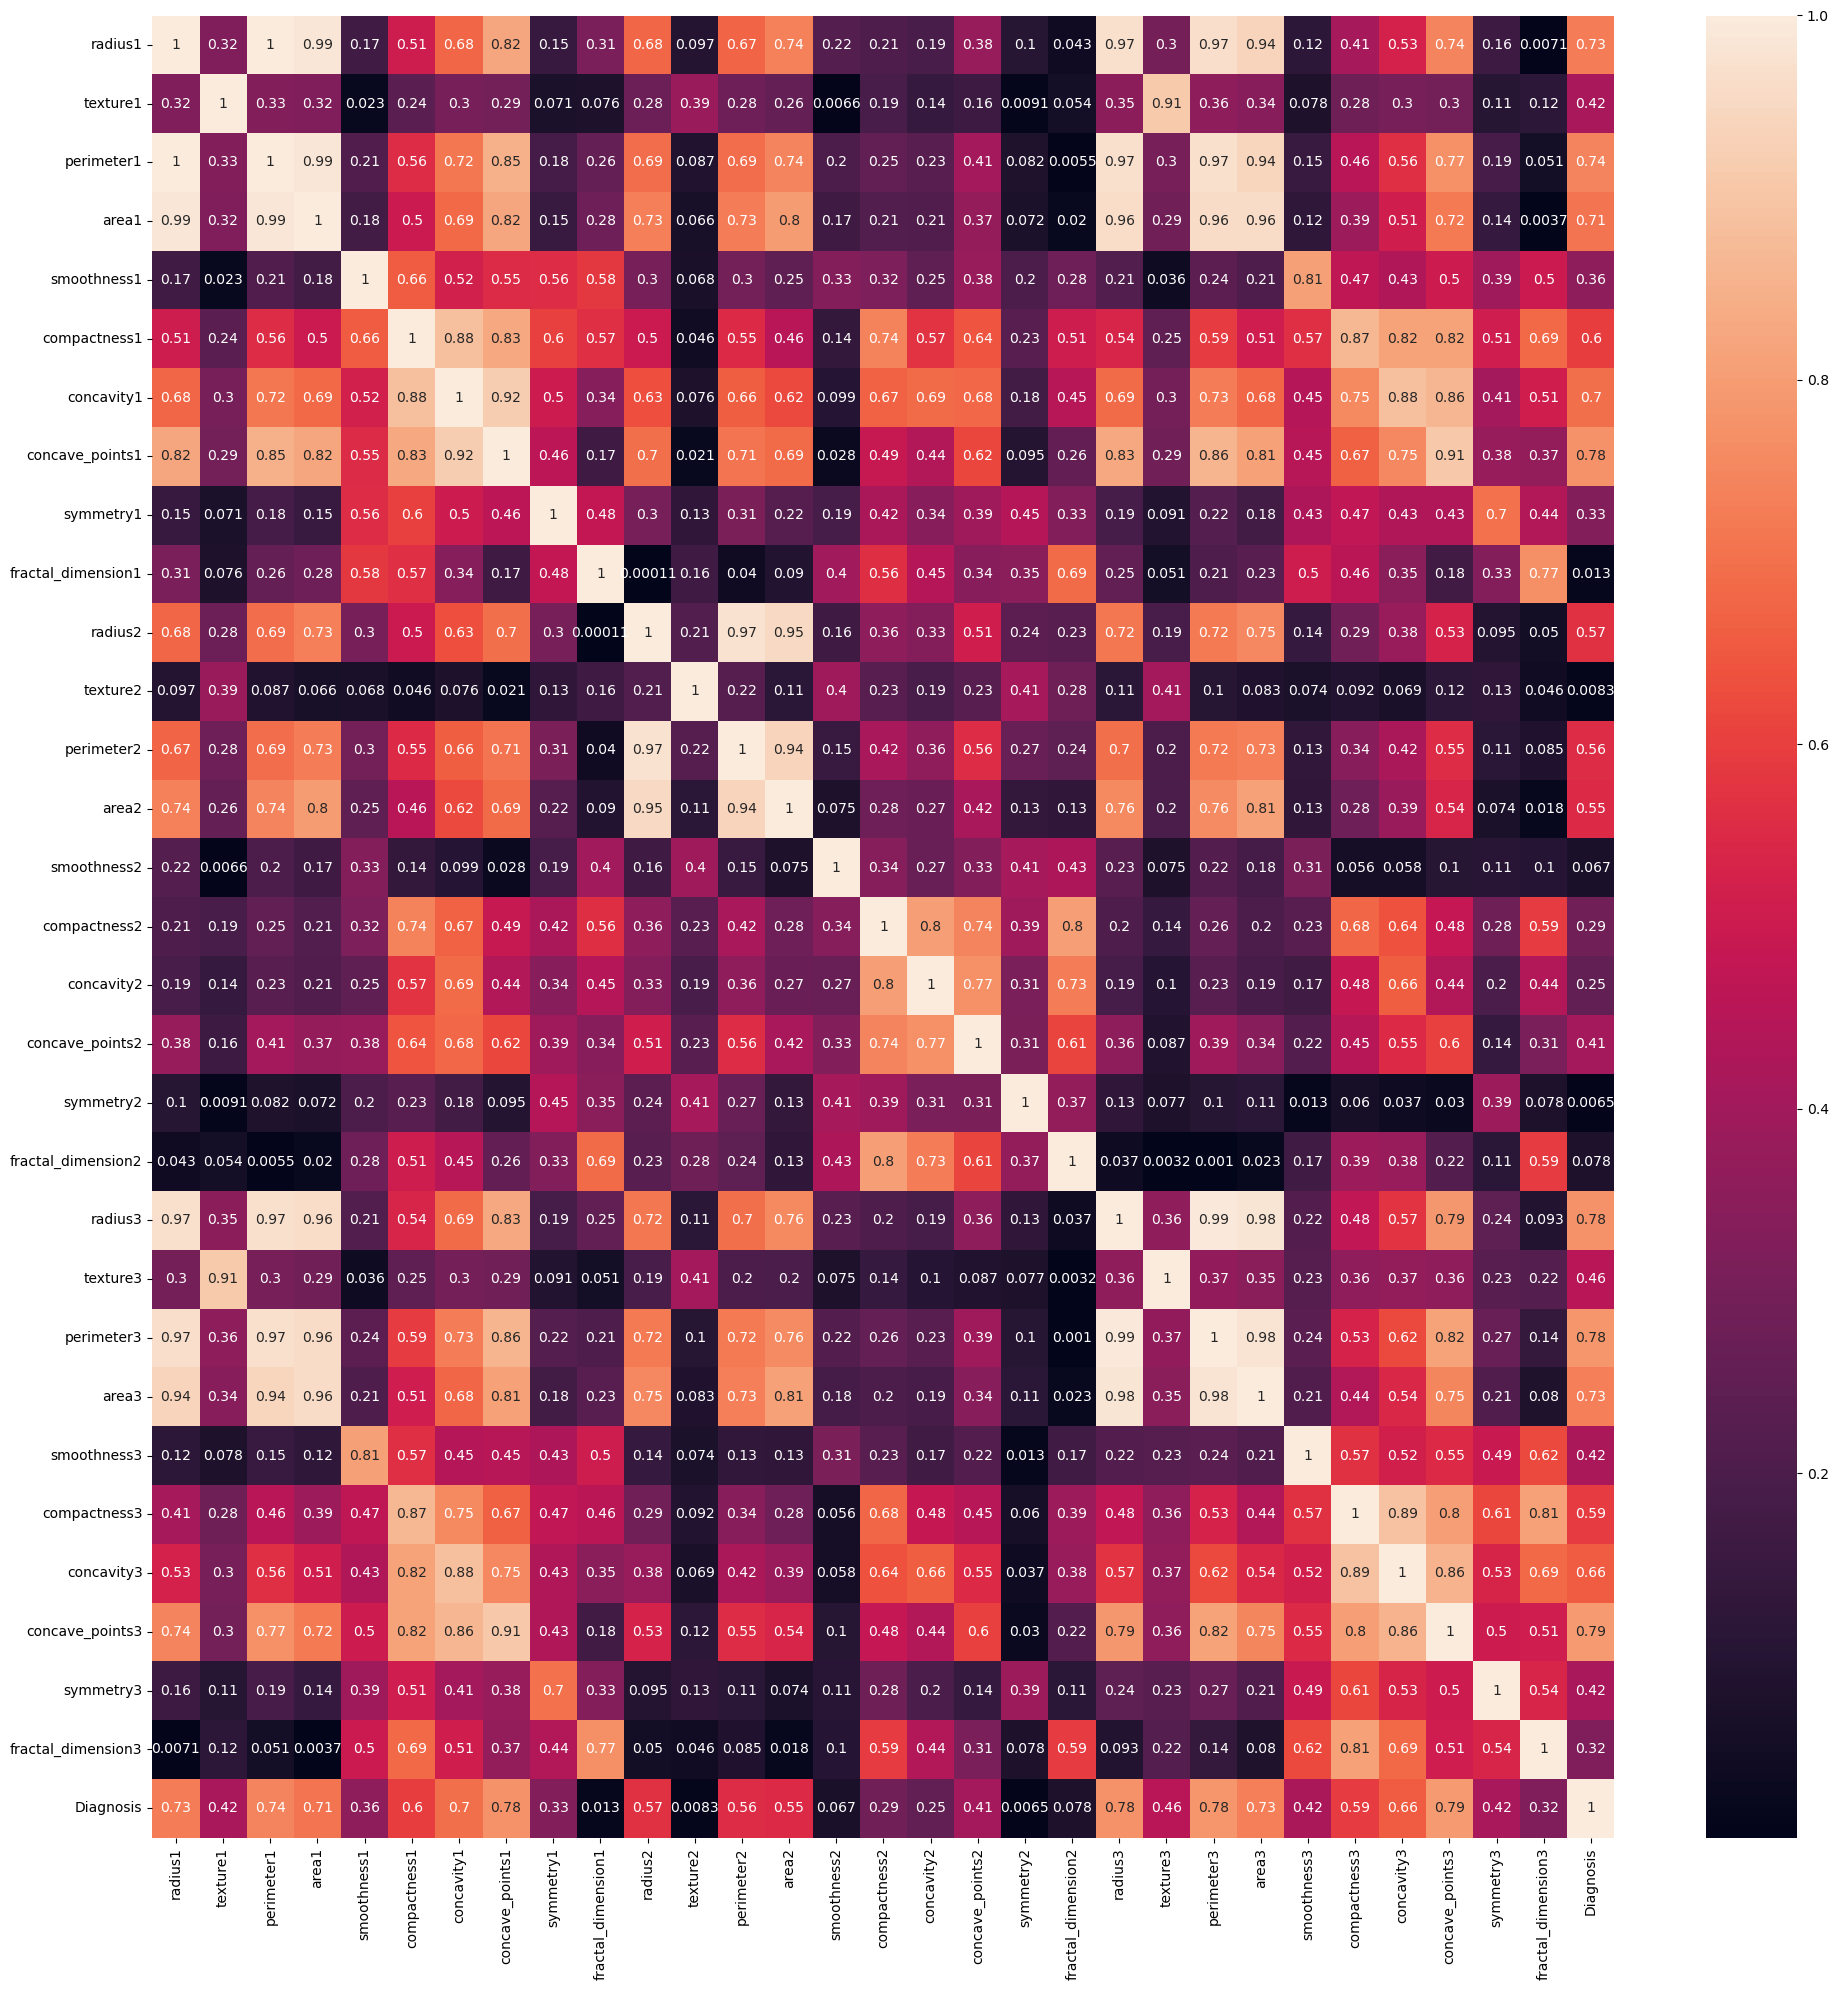

In [15]:
plt.figure(figsize=(20, 20))  # Adjust the width and height as needed

sns.heatmap(numeric_data.corr().abs(), annot = True)
plt.tight_layout()
plt.show()

In [16]:
sns.set_context('talk')
#sns.set_palette(palette)
sns.set_style('white')

In [1]:
#so larget I had to undo it to save it in github. 
#sns.pairplot(numeric_data, hue='Diagnosis')
#plt.tight_layout()
#plt.show()

In [17]:
#identify those that are most correlated to diagnosis and ID those that may be redundant

#taking its absolute value of the pearson's correlation to get those that are both positive and negative
df_abs_corr = df.corr().Diagnosis.abs().sort_values(ascending=False)

In [21]:
df_abs_corr

Diagnosis             1.000000
concave_points3       0.793566
perimeter3            0.782914
concave_points1       0.776614
radius3               0.776454
perimeter1            0.742636
area3                 0.733825
radius1               0.730029
area1                 0.708984
concavity1            0.696360
concavity3            0.659610
compactness1          0.596534
compactness3          0.590998
radius2               0.567134
perimeter2            0.556141
area2                 0.548236
texture3              0.456903
smoothness3           0.421465
symmetry3             0.416294
texture1              0.415185
concave_points2       0.408042
smoothness1           0.358560
symmetry1             0.330499
fractal_dimension3    0.323872
compactness2          0.292999
concavity2            0.253730
fractal_dimension2    0.077972
smoothness2           0.067016
fractal_dimension1    0.012838
texture2              0.008303
symmetry2             0.006522
Name: Diagnosis, dtype: float64

## There are 10 main features for each breast cancer diagnosis and the top correlated is going to be included 

1) radius (mean of distances from center to points on the perimeter)
2) texture (standard deviation of gray-scale values)
3) perimeter
4) area
5) smoothness (local variation in radius lengths)
6) compactness (perimeter^2 / area - 1.0)
7) concavity (severity of concave portions of the contour)
8) concave points (number of concave portions of the contour)
9) symmetry 
10) fractal dimension ("coastline approximation" - 1)

In [18]:
df.columns

Index(['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
       'compactness1', 'concavity1', 'concave_points1', 'symmetry1',
       'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2',
       'smoothness2', 'compactness2', 'concavity2', 'concave_points2',
       'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3',
       'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3',
       'symmetry3', 'fractal_dimension3', 'Diagnosis'],
      dtype='object')

In [19]:
df_subset = df[['concave_points3', 'perimeter3', 'radius3', 'area3', 'concavity1', 'compactness1', 'Diagnosis']]


In [20]:
df_subset

,concave_points3,perimeter3,radius3,area3,concavity1,compactness1,Diagnosis
0,0.2654,184.60,25.380,2019.0,0.30010,0.27760,1.0
1,0.1860,158.80,24.990,1956.0,0.08690,0.07864,1.0
2,0.2430,152.50,23.570,1709.0,0.19740,0.15990,1.0
3,0.2575,98.87,14.910,567.7,0.24140,0.28390,1.0
4,0.1625,152.20,22.540,1575.0,0.19800,0.13280,1.0
...,...,...,...,...,...,...,...
564,0.2216,166.10,25.450,2027.0,0.24390,0.11590,1.0
565,0.1628,155.00,23.690,1731.0,0.14400,0.10340,1.0
566,0.1418,126.70,18.980,1124.0,0.09251,0.10230,1.0
567,0.2650,184.60,25.740,1821.0,0.35140,0.27700,1.0


C:\Users\arutherford\AppData\Local\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


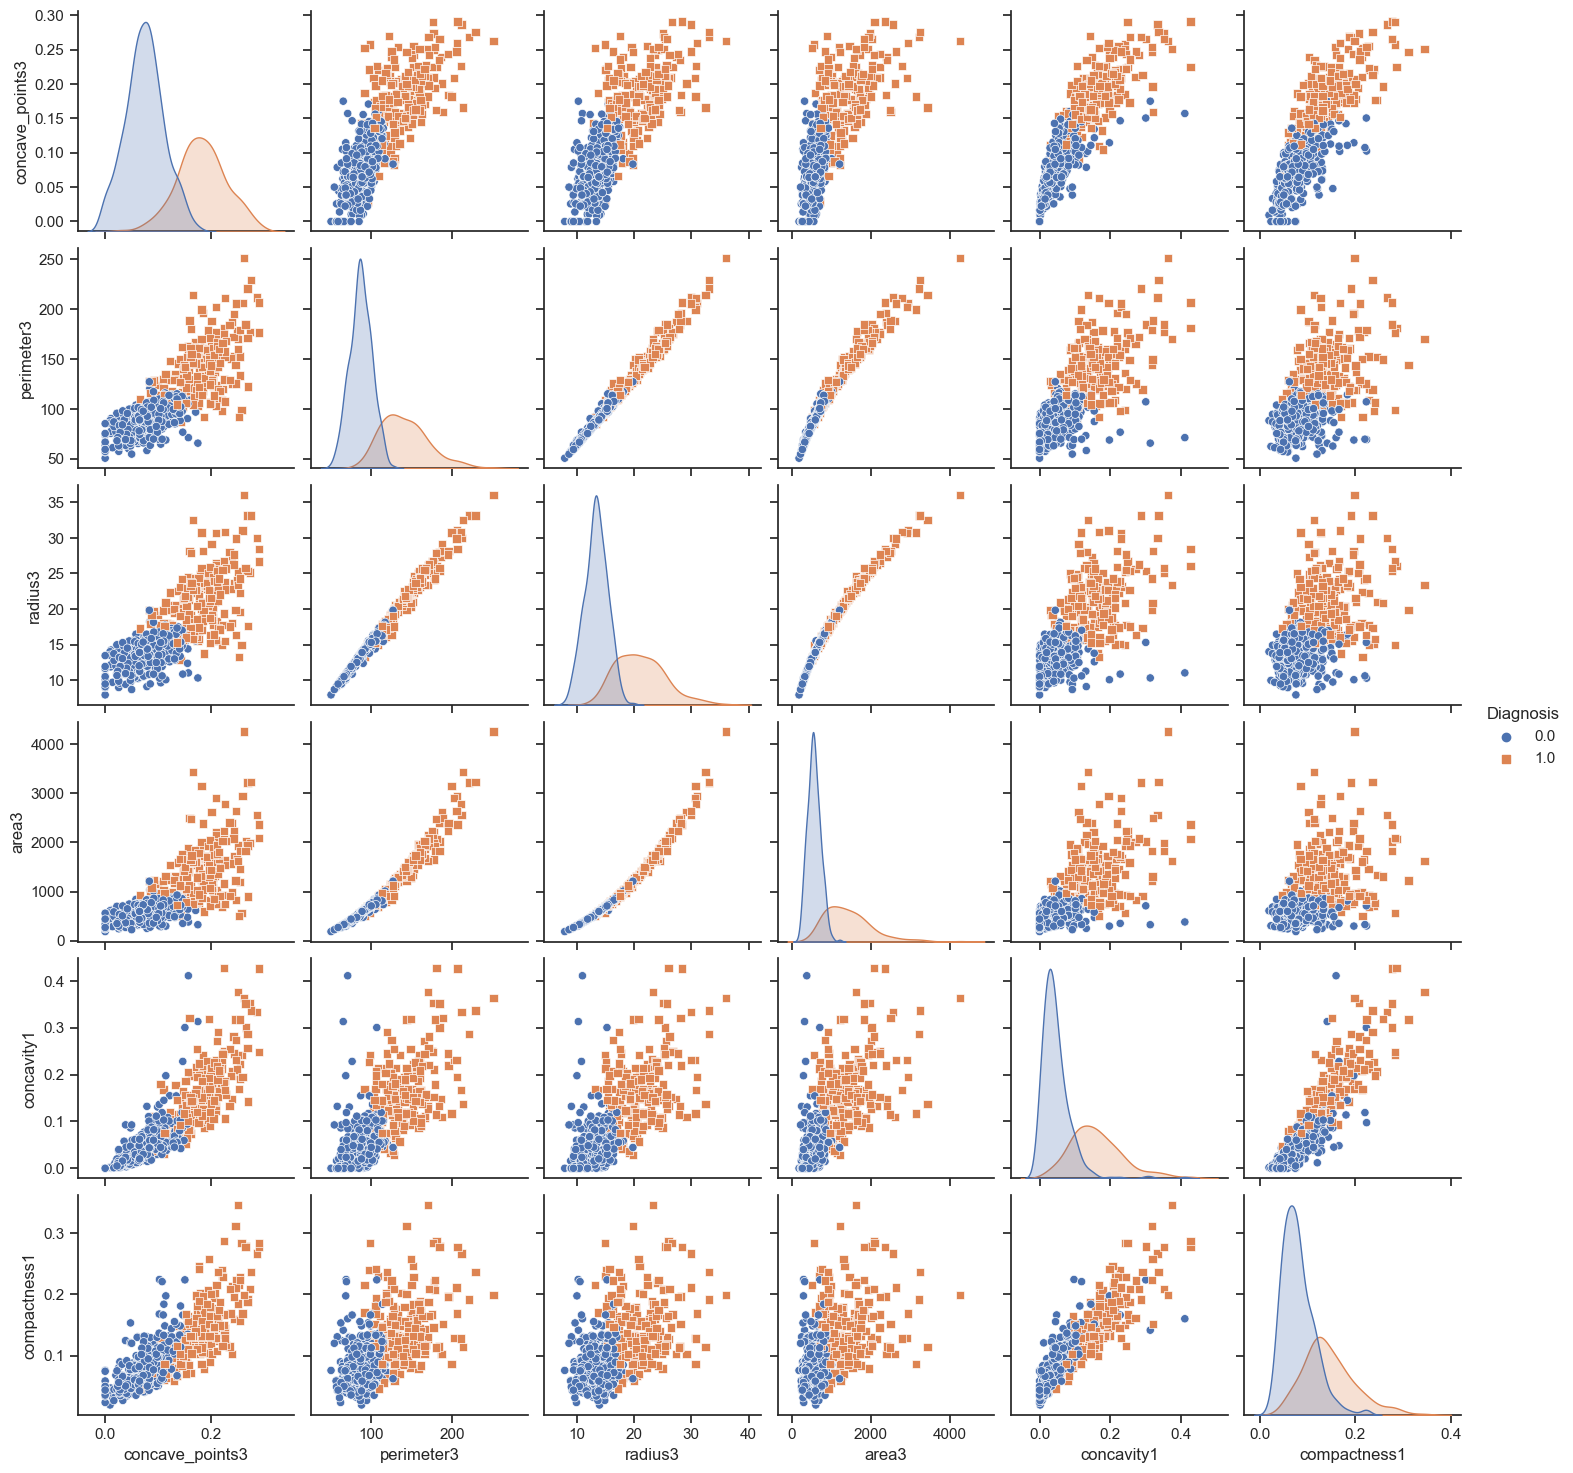

In [26]:
sns.set(style="ticks")
sns.pairplot(df_subset, hue="Diagnosis", markers=["o", "s"])
plt.show()

In [21]:
X_sub = df_subset.drop('Diagnosis', axis=1)  # axis=1 specifies that you're dropping a column
y_sub = df_subset['Diagnosis']

## SVM Overview

SVM tries to find hyperplanes that have the maximum margin. The hyperplanes are determined by support vectors (data points have the smallest distance to the hyperplanes). Meanwhile, in order to reduce model variance, the SVM model aims to find the maximum possible margins so that unseen data will be more likely to be classified correctly.


<left>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/module3_svm/images/svm.png" width="360" alt="evaluation metrics">
</left>

SVM addresses non-linear separable via kernel trick. Kernels are a special type of function that takes two vectors and returns a real number, like a dot-product operation. As such, kernels are not any real mapping functions from low dimensional spaces to high dimensional spaces.

For example, suppose we have two vectors $x = (x_{1}, x_{2})$ and $y = (y_{1}, y_{2})$

Now we have a simple polynomial kernel like the following:


$$k(x, y) = (x^Ty)^2$$


If we apply the kernel on vector `x` and `y`, we will get:


$$k(x, y) = (x^Ty)^2 = (x_{1}y_{1} + x_{2}y_{2})^2 = x_{1}^2y_{1}^2 + x_{2}^2y_{2}^2 + 2x_{1}x_{2}y_{1}y_{2}$$


It can be seen as a dot-product between two higher-dimensional vectors (`3-dimensional`):


$$\hat{x} = (x_{1}^2, x_{2}^2, \sqrt{2}x_{1}x_{2}) $$


$$\hat{y} = (y_{1}^2, x_{2}^2, \sqrt{2}y_{1}y_{2})$$

As such, computing the `k(x, y)` is equivalent to computing a dot-product of the higher dimensional vectors, without doing the actual feature space transforms. Consequently, SVM with non-linear kernels can transform existing features into high dimensional features that can be linearly separated in higher dimensional spaces.


In [36]:
# !mamba install -qy pandas==1.3.3 numpy==1.21.2 ipywidgets==7.4.2 scipy==7.4.2 tqdm==4.62.3 matplotlib==3.5.0 seaborn==0.9.0

# install imbalanced-learn package
#!pip install imbalanced-learn==0.8.0
# Note: If your environment doesn't support "!mamba install", use "!pip install" 

In [43]:
#pip install --upgrade scikit-learn imbalanced-learn


  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/92/e8/86c36e1b13007ca9c89381adac6c078cfc8fb71841a76c08a3fe3eca91d3/imbalanced_learn-0.12.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.4 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/10.6 MB 8.0 MB/s eta 0:00:02
   --------- ------------------------------ 2.5/10.6 MB 17.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/10.6 MB 22.1 MB/s eta 0:00:01
   ---------------------- ----------------- 6.0/10.6 MB 25.8 MB/s eta 0:00:01
   ------------------------------- -------- 8.3/10.6 MB 29.6 MB/s eta 0:00:01
   ------------------

In [22]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
# Evaluation metrics related methods
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix, precision_recall_fscore_support, precision_score, recall_score

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
%matplotlib inline

## Build a SVM model with default parameters

First, let's split the training and testing dataset. Training dataset will be used to train and tune models, and testing dataset will be used to evaluate the models. Note that you may also split a validation dataset from the training dataset for model tuning only.

In [76]:
# First, let's split the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X_sub, y_sub, test_size=0.2, stratify=y, random_state = 123)

We first define a `sklearn.svm import SVC` model with all default arguments. Revel converts it into a one-dimensional Numpy array. This operation is commonly performed when working with machine learning algorithms that expect the target variable to be in a one-dimensional array rather than a DataFrame.







In [30]:
model = SVC()

evel converts it into a one-dimensional Numpy array. This operation is commonly performed when working with machine learning algorithms that expect the target variable to be in a one-dimensional array rather than a DataFrame.


In [31]:
model.fit(X_train, y_train.values.ravel())

SVC()

Prediction

In [32]:
preds = model.predict(X_test)

Here we defined a utility method to evaluate the model performance.

In [61]:
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp, average='binary')
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [62]:
evaluate_metrics(y_test, preds)

{'accuracy': 0.9298245614035088,
 'recall': 0.8571428571428571,
 'precision': 0.9473684210526315,
 'f1score': 0.9}

The default SVM model achieves relatively good performance on this binary classification task. 

The overall accuracy is around `0.929` and the F1 Score is around `0.9`.


## Customizing the model to improve performance

## Train SVM with different regularization parameters and kernels


The `SVC` model provided by sklearn has two important arguments to be tuned: regularization parameter `C` and `kernel`.

    The `C` argument is a regularization parameter that controls the trade-off between achieving a low training error and keeping the decision boundary as simple as possible. 

*   For large values of C, the optimization will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly, which may cause the model to overfit.
*   Conversely, a very small value of C will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points, but potentially better generalization to unseen data.

The `kernel` argument specifies the kernel to be used for transforming features to higher-dimensional spaces, some commonly used non-linear kernels are:

*   `rbf`: Gaussian Radial Basis Function (RBF)
*   `poly`: Polynomial Kernel
*   `sigmoid`: Sigmoid Kernel


C = 10 and Kernel = 'rbf'

In [35]:
model_C10_rbf = SVC(C=10, kernel='rbf')
model_C10_rbf.fit(X_train, y_train.values.ravel())
preds_C10_rbf = model_C10_rbf.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9298245614035088,
 'recall': 0.8571428571428571,
 'precision': 0.9473684210526315,
 'f1score': 0.9}

This is better performance than the default SVM model


## Tune regularization parameter C and Kernels via GridSearch


`sklearn` provides users with many automatic hyperparameter tuning methods. A popular one is grid search cross-validation `GridSearchCV`

`GridSearchCV` to find the optimized `C` and `kernel` combination:

We first define some candidate parameter values we want to search in a `dict` object, like the following setting:


In [36]:
params_grid = {
    'C': [1, 10, 100],
    'kernel': ['poly', 'rbf', 'sigmoid']
}

In [37]:
model = SVC()

`GridSearchCV` method to grid search `params_grid` and find the optimized combination with best `f1` score.


In [38]:
# Define a GridSearchCV to search the best parameters
grid_search = GridSearchCV(estimator = model, 
                           param_grid = params_grid, 
                           scoring='f1',
                           cv = 5, verbose = 1)
# Search the best parameters with training data
grid_search.fit(X_train, y_train.values.ravel())
best_params = grid_search.best_params_

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [55]:
best_params

{'C': 10, 'kernel': 'poly'}

Implementation of the best parameters c = 10 and kernel = poly

In [63]:
model = SVC(C=10, kernel='poly')
model.fit(X_train, y_train.values.ravel())
preds = model.predict(X_test)
evaluate_metrics(y_test, preds)

{'accuracy': 0.9298245614035088,
 'recall': 0.8571428571428571,
 'precision': 0.9473684210526315,
 'f1score': 0.9}

In [73]:
print(classification_report(y_test, preds))

SVM_C10_poly = classification_report(y_test, preds, target_names=target_names)

              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        72
         1.0       0.95      0.86      0.90        42

    accuracy                           0.93       114
   macro avg       0.93      0.91      0.92       114
weighted avg       0.93      0.93      0.93       114



The best f1score now becomes `0.9` after hyperparameter tuning.

 ## Visualizing the  Hyperplains and Margins in the SVM Model

Simplify the dataset to include only 1000 instances and with only the 2 most associated features and the Diagnosis

In [51]:
simplified_df = df[['concave_points3', 'perimeter3', 'Diagnosis']]

In [52]:
X = simplified_df.iloc[:1000, :-1].values
y = simplified_df.iloc[:1000, -1:].values

and we undersample the majority class `Class = 0` to balance the class distribution so we will produce a clearer visualization.


In [53]:
under_sampler = RandomUnderSampler(random_state=123)
X_under, y_under = under_sampler.fit_resample(X, y)

To better show the hyperplane and margins, we normalize the features with a `MinMaxScaler`.

In [54]:
print(f"Dataset resampled shape, X: {X_under.shape}, y: {y_under.shape}")

Dataset resampled shape, X: (424, 2), y: (424,)


Okay, let's first train a linear SVM model with `kernel=linear` so that we can get a linear hyperplane and margins.

In [55]:
linear_svm = SVC(C=1000, kernel='linear')
linear_svm.fit(X_under, y_under)

SVC(C=1000, kernel='linear')

In [56]:
def plot_decision_boundry(X, y, model):
    plt.figure(figsize=(16, 12))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(
        XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"]
    )

    # plot support vectors
    ax.scatter(
        model.support_vectors_[:, 0],
        model.support_vectors_[:, 1],
        s=100,
        linewidth=1,
        facecolors="none",
        edgecolors="k",
    )
    plt.show()

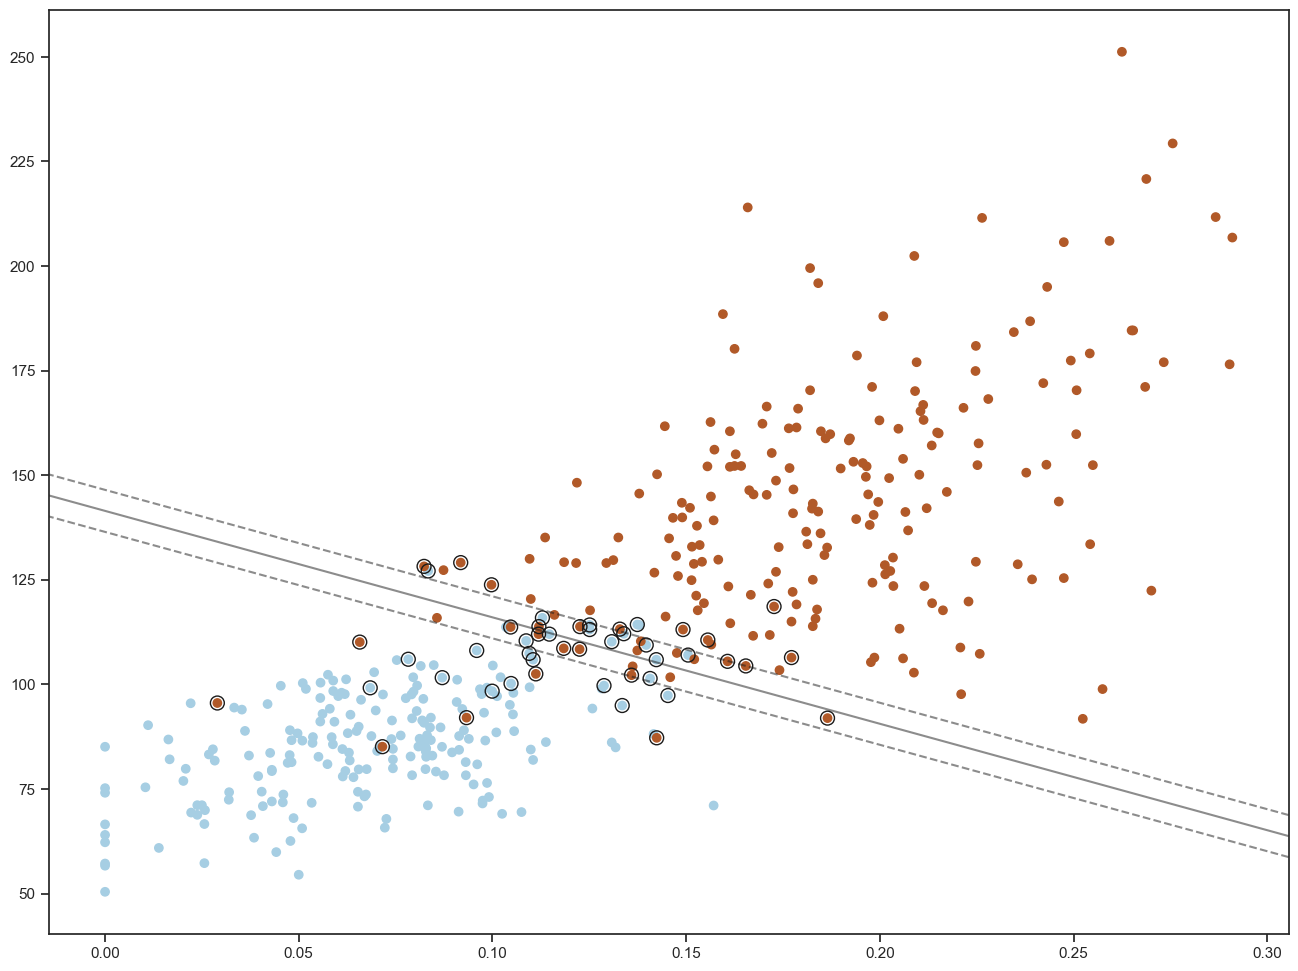

In [57]:
plot_decision_boundry(X_under, y_under, linear_svm)

Okay, we can see a clear linear hyperplane seperates the two classes (Blue dots vs Orange dots). The highlighted dots are the support vectors determining the hyperplain.


If we want to include non-linear kernels, we should get a non-linear decision boundary in the 2-d space (maybe linear in higher feature space). So here we use a `rbf` kernel:


In [58]:
svm_rbf_kernel = SVC(C=100, kernel='rbf')
svm_rbf_kernel.fit(X_under, y_under)

SVC(C=100)

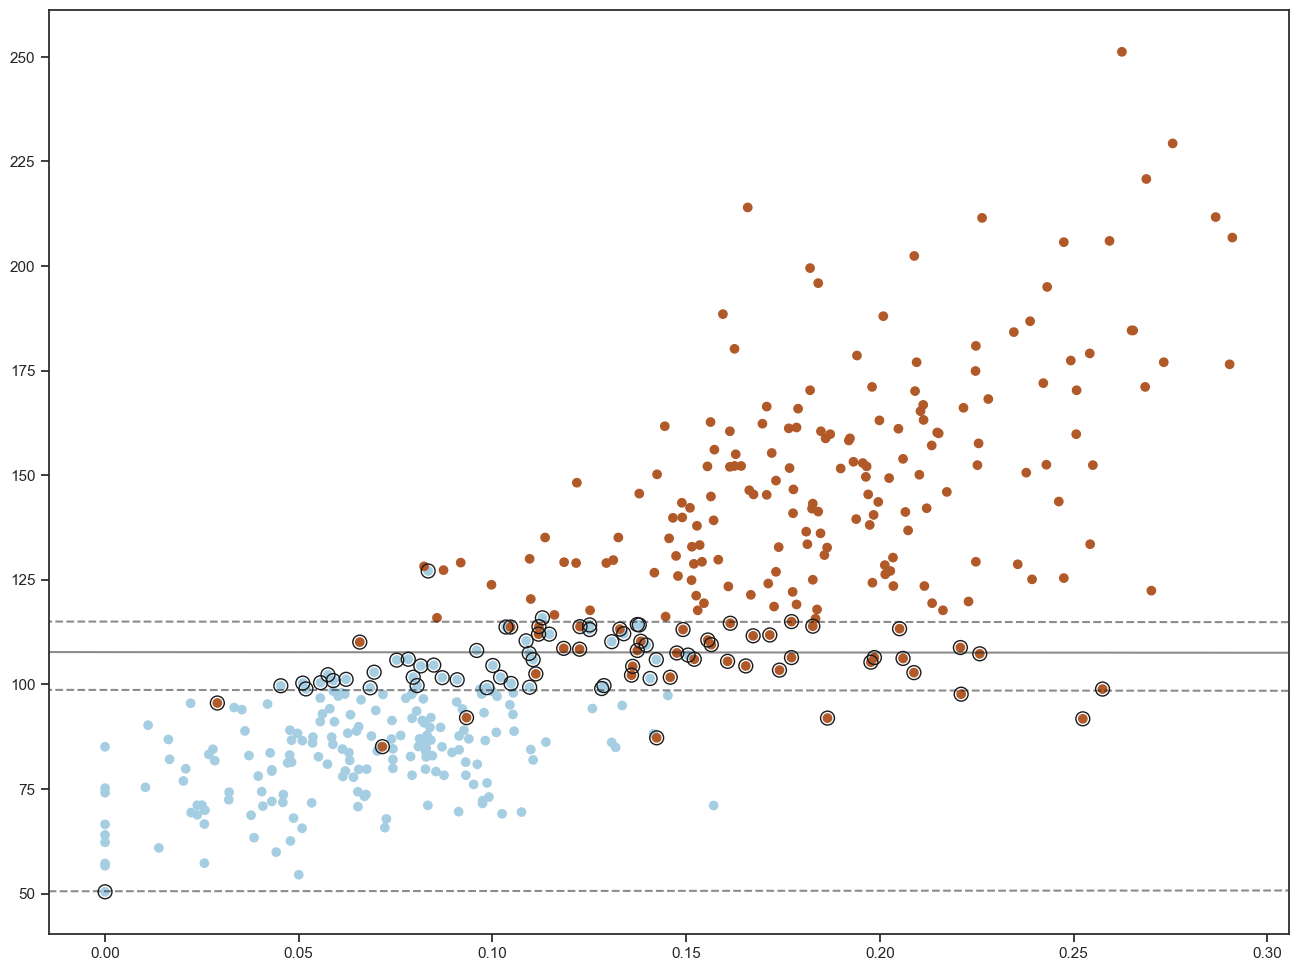

In [60]:
plot_decision_boundry(X_under, y_under, svm_rbf_kernel)

poly kernel was the best based on the gridsearch CV

In [63]:
svm_poly_kernel = SVC(C=10, kernel='poly')
svm_poly_kernel.fit(X_under, y_under)

SVC(C=10, kernel='poly')

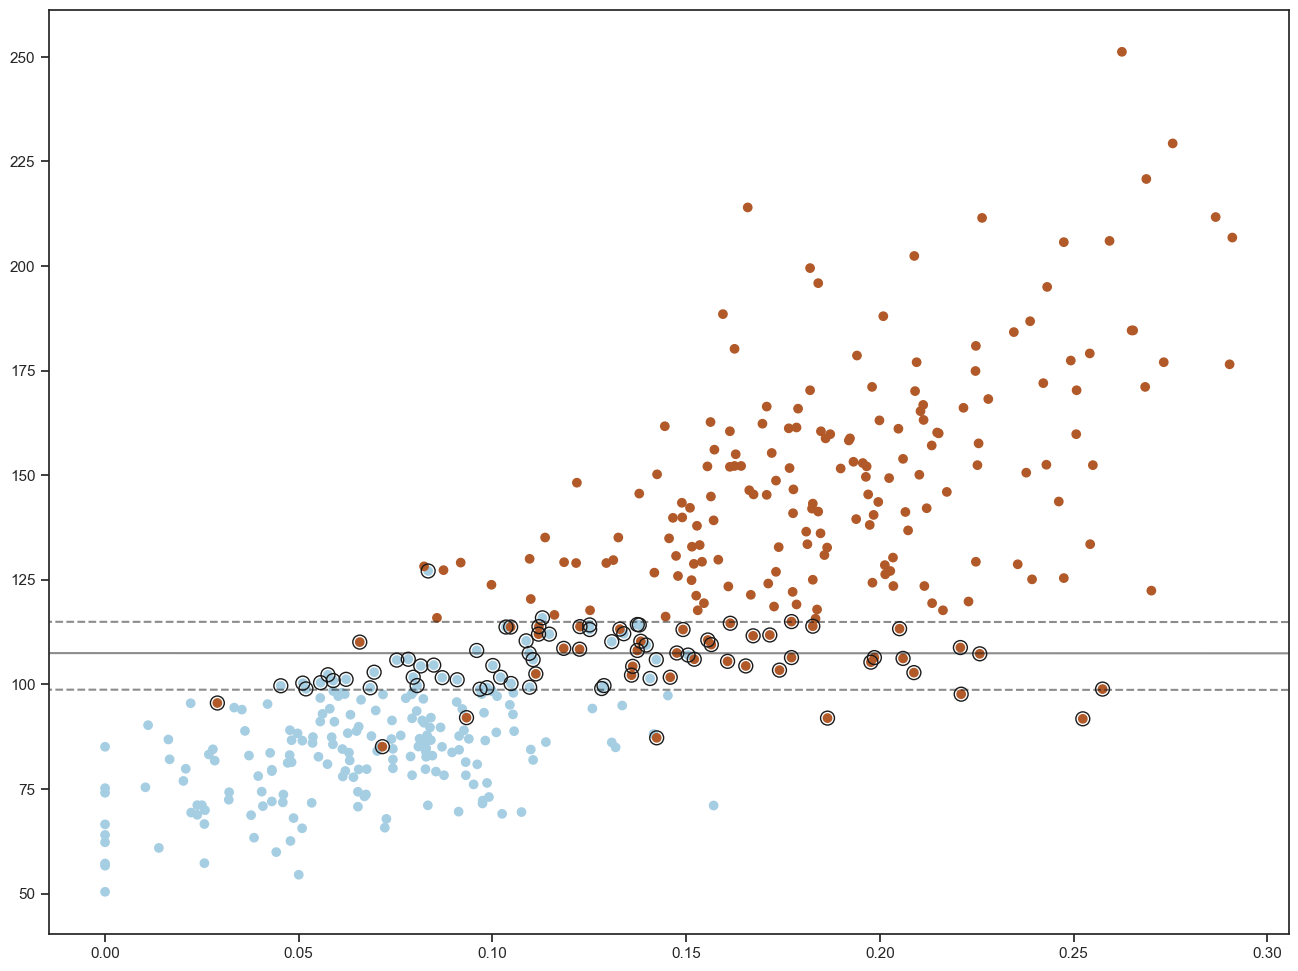

In [64]:
plot_decision_boundry(X_under, y_under, svm_poly_kernel)

The hyperplane seperates the two classes (Blue dots vs Orange dots). The highlighted dots are the support vectors determining the hyperplain.

## Logisitic Regression

In [66]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=16)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

C:\Users\arutherford\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Logistic Regression Model Evaluation

<a id="ref1"></a>
While Linear Regression is suited for estimating continuous values (e.g. estimating house price), it is not the best tool for predicting the class of an observed data point. In order to estimate the class of a data point, we need some sort of guidance on what would be the <b>most probable class</b> for that data point. For this, we use <b>Logistic Regression</b>.

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>Recall linear regression:</strong></font>
<br>
<br>
    As you know, <b>Linear regression</b> finds a function that relates a continuous dependent variable, <b>y</b>, to some predictors (independent variables $x_1$, $x_2$, etc.). For example, simple linear regression assumes a function of the form:
<br><br>
$$
y = \theta_0 + \theta_1  x_1 + \theta_2  x_2 + \cdots
$$
<br>
and finds the values of parameters $\theta_0, \theta_1, \theta_2$, etc, where the term $\theta_0$ is the "intercept". It can be generally shown as:
<br><br>
$$
ℎ_\theta(𝑥) = \theta^TX
$$
<p></p>

</div>

Logistic Regression is a variation of Linear Regression, used when the observed dependent variable, <b>y</b>, is categorical. It produces a formula that predicts the probability of the class label as a function of the independent variables.

Logistic regression fits a special s-shaped curve by taking the linear regression function and transforming the numeric estimate into a probability with the following function, which is called the sigmoid function 𝜎:

$$
ℎ_\theta(𝑥) = \sigma({\theta^TX}) =  \frac {e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +...)}}{1 + e^{(\theta_0 + \theta_1  x_1 + \theta_2  x_2 +\cdots)}}
$$
Or:
$$
ProbabilityOfaClass_1 =  P(Y=1|X) = \sigma({\theta^TX}) = \frac{e^{\theta^TX}}{1+e^{\theta^TX}} 
$$

In this equation, ${\theta^TX}$ is the regression result (the sum of the variables weighted by the coefficients), `exp` is the exponential function and $\sigma(\theta^TX)$ is the sigmoid or [logistic function](http://en.wikipedia.org/wiki/Logistic_function?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork1047-2023-01-01), also called logistic curve. It is a common "S" shape (sigmoid curve).

So, briefly, Logistic Regression passes the input through the logistic/sigmoid but then treats the result as a probability:

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/mod_ID_24_final.png" width="400" align="center">


The objective of the __Logistic Regression__ algorithm, is to find the best parameters θ, for $ℎ_\theta(𝑥)$ = $\sigma({\theta^TX})$, in such a way that the model best predicts the class of each case.


In [25]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[68,  4],
       [ 5, 37]], dtype=int64)

Here, you can see the confusion matrix in the form of the array object. The dimension of this matrix is 2*2 because this model is binary classification. You have two classes 0 and 1. Diagonal values represent accurate predictions, while non-diagonal elements are inaccurate predictions. In the output, 113 and 55 are actual predictions, and 31 and 24 are incorrect predictions.

## Visualizing Confusion Matrix using Heatmap

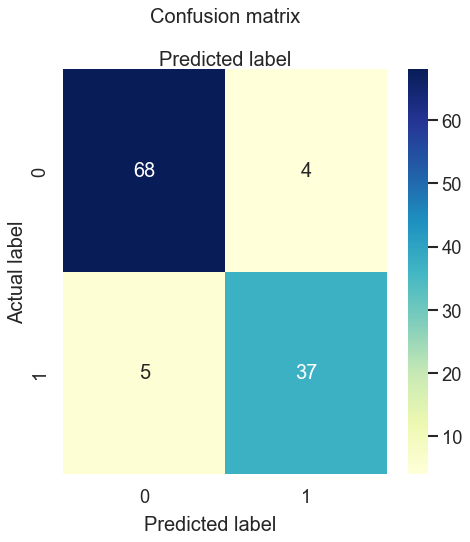

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming you have defined cnf_matrix earlier

class_names = [0, 1]  # name of classes
fig, ax = plt.subplots(dpi=80)  # Adjust the DPI value as needed
fig.set_size_inches(6, 6)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.text(0.5, 2.275, 'Predicted label')


plt.show()


In [67]:
from sklearn.metrics import classification_report
target_names = ['Malignant', 'Benign']
print(classification_report(y_test, y_pred, target_names=target_names))


LogRegReport = classification_report(y_test, y_pred, target_names=target_names)

              precision    recall  f1-score   support

   Malignant       0.93      0.94      0.94        72
      Benign       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



## Logistic Regression ROC Curve

Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.
#how to interpret an ROC curve: Classifiers that give curves closer to the top-left corner indicate a better performance. As a baseline, a random classifier is expected to give points lying along the diagonal (FPR = TPR). The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test


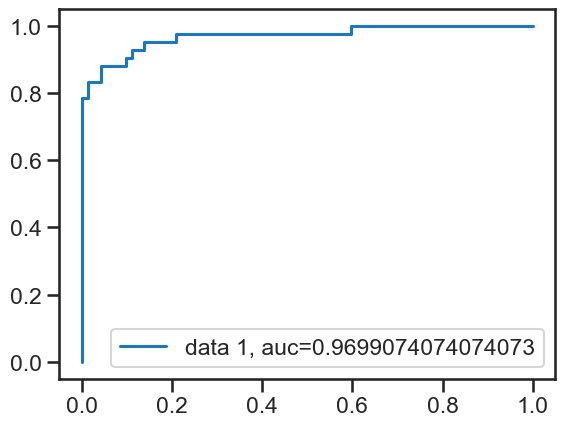

In [77]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

An AUC (Area Under the ROC Curve) of 0.9699 for a logistic regression model suggests that the model has excellent discriminative ability in distinguishing between the two classes it's tasked to classify. Here's how to interpret this AUC score:

AUC ranges from 0 to 1, where 0 indicates a poor model (it's essentially guessing) and 1 indicates a perfect model (it perfectly separates the two classes).
AUC values closer to 1 indicate better discrimination. Therefore, a value of 0.9699 suggests very strong performance.

In conclusion, an AUC of 0.9699 indicates that the logistic regression model is highly effective in its predictive ability and would likely be considered a valuable tool in the context of tumor classification or any other binary classification task it's applied to.


## K Nearest Neighbors

K-Nearest Neighbors (KNN) is a non-parametric and instance-based machine learning algorithm utilized for classification tasks. Unlike Linear Regression, which is suitable for estimating continuous values, KNN is specifically designed for predicting the class of observed data points. In KNN, the class of a data point is determined based on the class of its nearest neighbors. This proximity-based approach makes KNN particularly effective when there is no underlying assumption about the distribution of the data.

The KNN algorithm works by calculating the distance between the data point to be classified and all other data points in the dataset. Typically, the Euclidean distance metric is used for this calculation, although other distance metrics can also be employed based on the nature of the data. After calculating distances, the algorithm identifies the k nearest neighbors to the data point in question. The class of the majority of these nearest neighbors is then assigned to the data point being classified. This makes KNN a straightforward yet powerful algorithm for classification tasks.

The key idea behind KNN is that data points with similar features tend to belong to the same class. Therefore, by considering the classes of neighboring data points, KNN makes predictions based on the local structure of the data. This approach is intuitive and can handle complex decision boundaries effectively, making KNN a versatile choice for various classification problems.

In summary, the objective of the K-Nearest Neighbors algorithm is to classify data points based on the majority class of their nearest neighbors. By leveraging proximity-based reasoning, KNN provides a simple yet robust method for classification tasks, particularly in situations where the underlying data distribution is not well-defined.

<img src="https://i0.wp.com/neptune.ai/wp-content/uploads/2022/10/KNN-diagram.png?resize=840%2C407&ssl=1" width="700" align="center">


In [48]:
# Estimate KNN model and report outcomes
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [49]:
# Preciision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', round(accuracy_score(y_test, y_pred), 2))
print('F1 Score: ', round(f1_score(y_test, y_pred), 2))

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92        72
         1.0       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114

Accuracy score:  0.89
F1 Score:  0.85


Confusion Matrix of n = 3

In [50]:
from sklearn.metrics import classification_report
target_names = ['Malignant', 'Benign']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Malignant       0.91      0.93      0.92        72
      Benign       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



Plot F1 results

* To determine the right value for K, examine results for values of K from 1 to 40.
* This time, focus on two measures, the F-1 Score, and the Error Rate (1-Accuracy).
* Generate charts which plot each of these measures as a function of K. 

Perform a series of iterations to evaluate the performance of a k-nearest neighbors (KNN) classifier on a dataset. 

This script is a simple implementation for evaluating the performance of a KNN classifier across different values of k, recording F1 scores and error rates for each k

In [52]:
max_k = 40
f1_scores = list()
error_rates = list() # 1-accuracy

for k in range(1, max_k):
    
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test)
    f1_scores.append((k, round(f1_score(y_test, y_pred), 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))
    
f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

<Figure size 1920x1440 with 0 Axes>

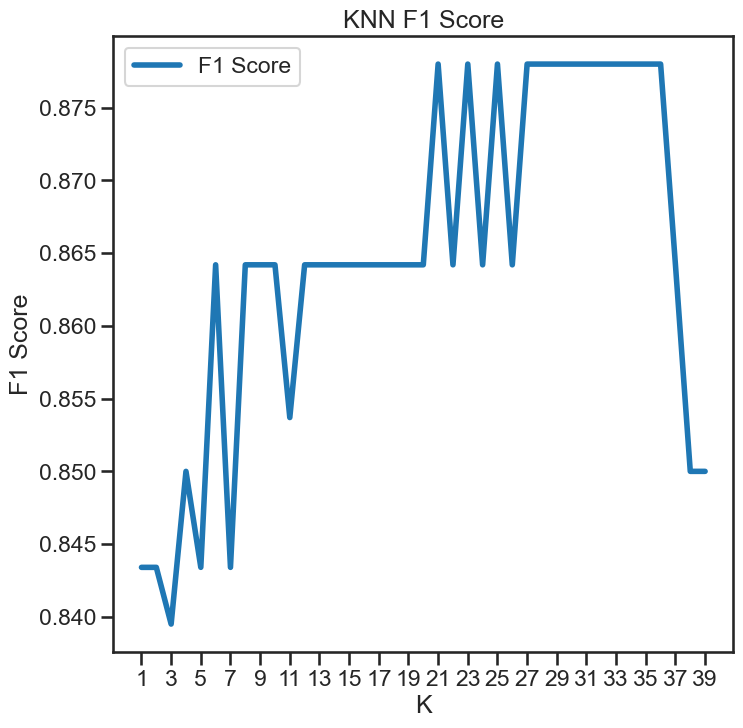

In [56]:
# Plot F1 results
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = f1_results.set_index('K').plot(figsize=(8, 8), linewidth=4)
ax.set(xlabel='K', ylabel='F1 Score')
ax.set_xticks(range(1, max_k, 2));
plt.title('KNN F1 Score')
plt.savefig('knn_f1.png')

Plot Elbow Accuracy (Error Rate) results

Text(0.5, 1.0, 'KNN Elbow Curve')

<Figure size 1920x1440 with 0 Axes>

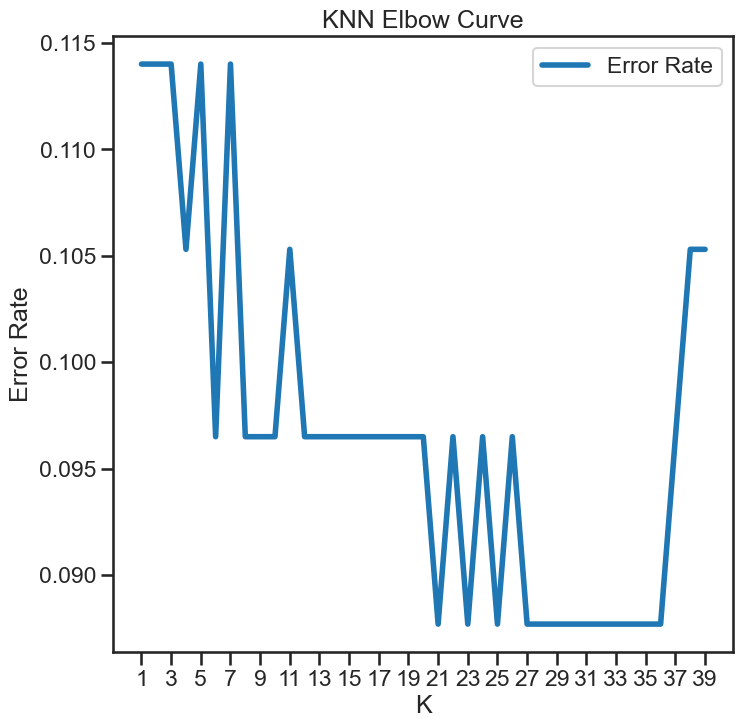

In [57]:
sns.set_context('talk')
sns.set_style('ticks')

plt.figure(dpi=300)
ax = error_results.set_index('K').plot(figsize=(8, 8), linewidth=4)
ax.set(xlabel='K', ylabel='Error Rate')
ax.set_xticks(range(1, max_k, 2))
plt.title('KNN Elbow Curve')
#plt.savefig('knn_elbow.png')

Based on the Elbow curve the K around 20 is the best 

KNN = 20

In [58]:
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [69]:
target_names = ['Malignant', 'Benign']
print(classification_report(y_test, y_pred, target_names=target_names))

KNN_20 = classification_report(y_test, y_pred, target_names=target_names)

              precision    recall  f1-score   support

   Malignant       0.93      0.94      0.94        72
      Benign       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



# Final Evaluation of the 3 different 

In [72]:
from tabulate import tabulate

# Assuming you have stored the classification reports as described
reports = {
    "Logistic Regression": LogRegReport,
    "KNN (k=20)": KNN_20,
    "SVM (C=10, kernel=poly)": SVM_C10_poly
}

# Print reports side by side
for name, report in reports.items():
    print(f"Classification Report for {name}:")
    print(report)
    print("\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

   Malignant       0.93      0.94      0.94        72
      Benign       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Classification Report for KNN (k=20):
              precision    recall  f1-score   support

   Malignant       0.93      0.94      0.94        72
      Benign       0.90      0.88      0.89        42

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.91       114
weighted avg       0.92      0.92      0.92       114



Classification Report for SVM (C=10, kernel=poly):
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.95        72
         1.0       0.95      0.86      0.90        42

    accuracy                           0.9

# Summary of the three different models

In summary, all three models achieve similar performance in terms of precision, recall, and F1-score for the Malignant and Benign classes, with SVM slightly outperforming the others in terms of overall accuracy and F1-score, especially for the Benign class. SVM with a polynomial kernel and C=10 exhibits the highest precision and F1-score for the Benign class, making it the best-performing model among the three for this particular dataset.

Overall the SVM model performed slightly better in  than the rest with F1 score of 0.95.  An F1 score of 0.95 indicates that the model's performance in terms of precision and recall is very high. The F1 score is the harmonic mean of precision and recall, ranging from 0 to 1, where 1 indicates perfect precision and recall. In this case, with an F1 score of 0.95, the model achieves a balance between precision (the proportion of correctly predicted positive cases among all predicted positive cases) and recall (the proportion of correctly predicted positive cases among all actual positive cases). Therefore, a high F1 score suggests that the model is effective at both minimizing false positives and false negatives, making it a strong performer in terms of classification accuracy

## Precision vs Recall Tradeoff

In the context of identifying malignant versus benign tumors, the precision-recall tradeoff is a crucial consideration in evaluating the performance of classification models like Logistic Regression, KNN, and SVM.

Precision measures the proportion of correctly identified positive cases (malignant tumors) out of all cases identified as positive. In this scenario, high precision means that when the model predicts a tumor as malignant, it's highly likely to be correct. On the other hand, recall (also known as sensitivity) measures the proportion of correctly identified positive cases out of all actual positive cases. High recall indicates that the model is effectively capturing most of the malignant tumors present in the dataset.

In the provided classification reports, we see varying precision and recall values for the malignant and benign classes across different models. For instance, in the SVM model, precision for the malignant class is 0.92, indicating that when the model predicts a tumor as malignant, it's correct around 92% of the time. Meanwhile, the recall for the malignant class in SVM is 0.97, suggesting that the model is capturing 97% of the actual malignant tumors.



## Key Findings and Next Steps

For the next steps and model selection criteria for a new or expanded dataset, based on the trade-offs between Support Vector Machine (SVM), k-Nearest Neighbors (kNN), and Logistic Regression, the model selection should consider the specific characteristics of the dataset and the goals of the analysis. If the dataset is small and noise-free, Logistic Regression might be a suitable choice due to its simplicity and interpretability. For datasets with complex relationships or potential outliers, SVM could be preferred for its robustness to noise and ability to handle non-linear decision boundaries through kernel tricks. However, if interpretability is a priority and computational resources are limited, kNN may be more appropriate, despite its scalability issues, as it offers straightforward interpretation and minimal parameter tuning. Understanding these trade-offs enables informed decision-making to select the most suitable algorithm for the task at hand.